In [35]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # ✅ Fix for MKL memory leak warning
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [36]:
data = pd.read_csv('Mall_Customers.csv')  # Ensure file is in the same folder or provide path
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [38]:
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [39]:
# Check for missing values
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


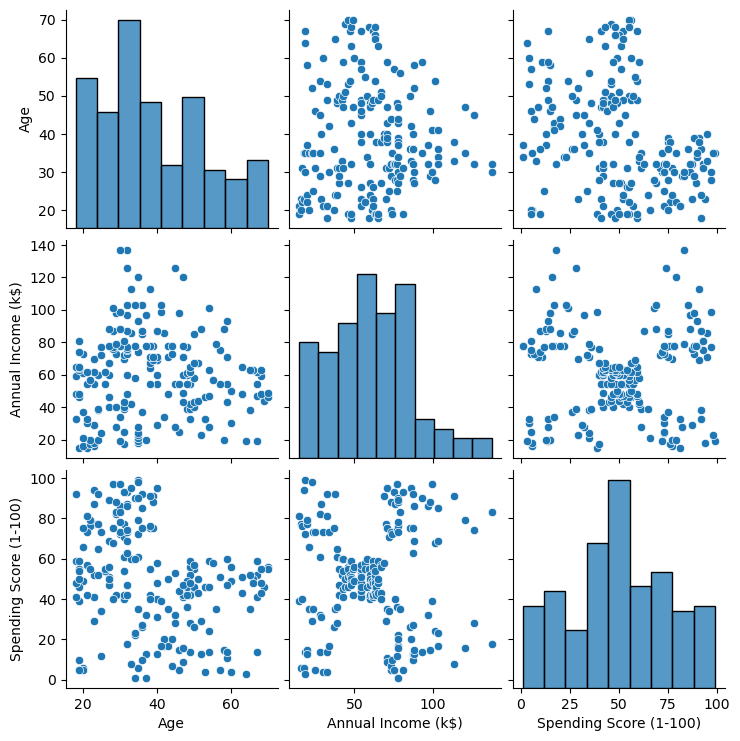

In [40]:
# Distribution plots
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [43]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

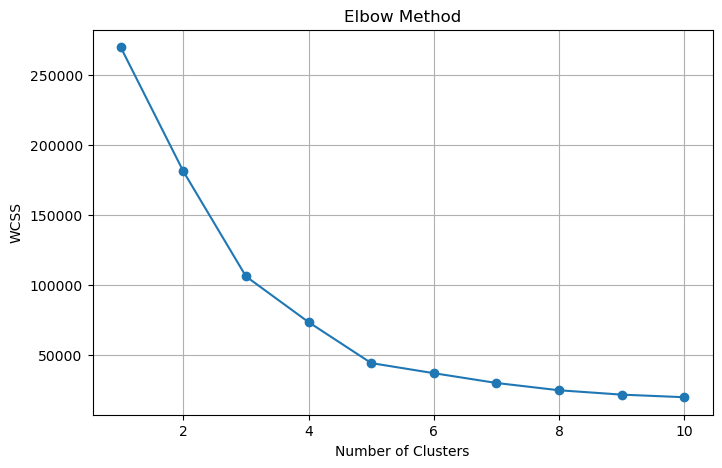

In [42]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [44]:
# From elbow method, assume K=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to data
data['Cluster'] = y_kmeans


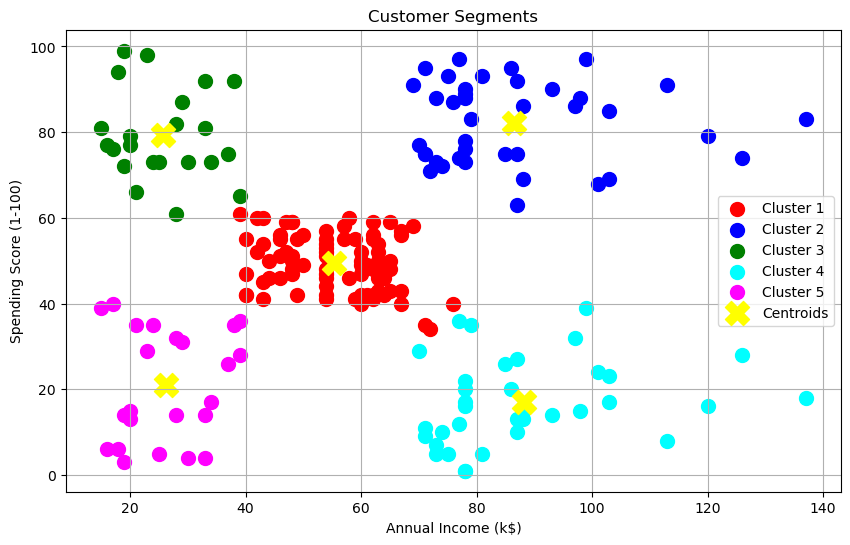

In [45]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X[y_kmeans == i]['Annual Income (k$)'],
                X[y_kmeans == i]['Spending Score (1-100)'],
                s=100, c=colors[i], label=f'Cluster {i+1}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', marker='X')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


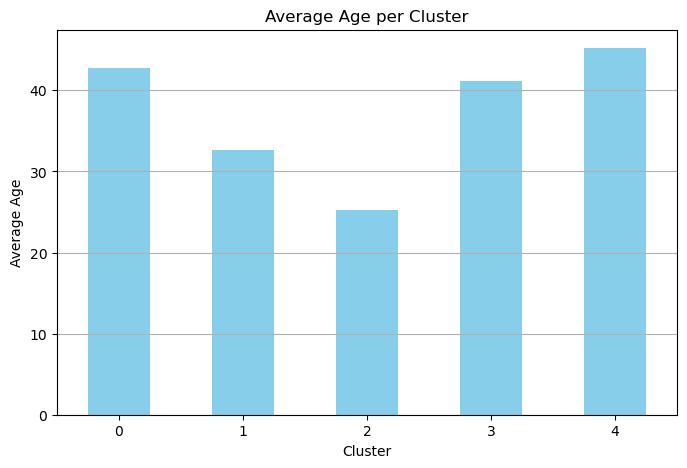

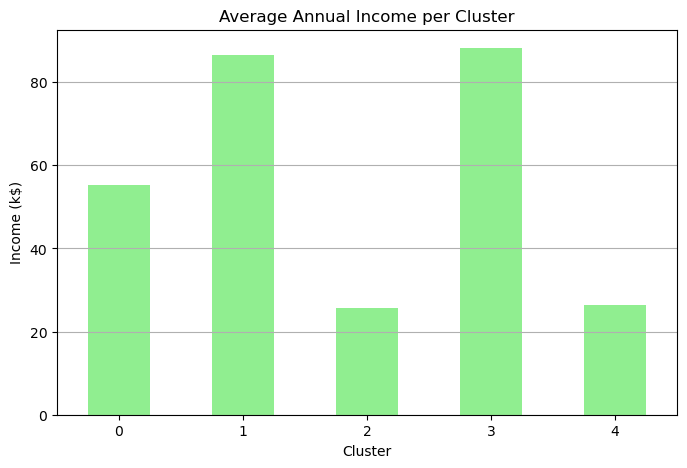

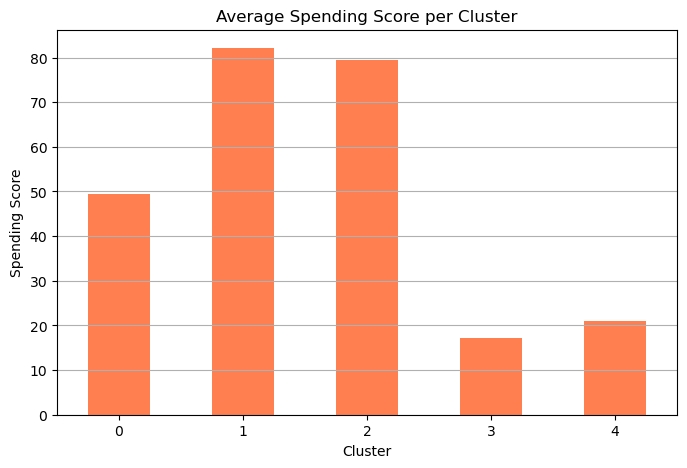

In [49]:


# Assign cluster labels
data['Cluster'] = y_kmeans

# Calculate cluster-wise averages
cluster_summary = data.groupby('Cluster').mean(numeric_only=True)

# Plot 1: Average Age
plt.figure(figsize=(8, 5))
cluster_summary['Age'].plot(kind='bar', color='skyblue')
plt.title('Average Age per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Age')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Plot 2: Average Income
plt.figure(figsize=(8, 5))
cluster_summary['Annual Income (k$)'].plot(kind='bar', color='lightgreen')
plt.title('Average Annual Income per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income (k$)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Plot 3: Average Spending Score
plt.figure(figsize=(8, 5))
cluster_summary['Spending Score (1-100)'].plot(kind='bar', color='coral')
plt.title('Average Spending Score per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
